In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

data1 = pd.read_csv('1.csv', encoding='gbk')

In [2]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [3]:
data1 = data1.set_index('第n个月')
data1

,库存资金额(x1),广告投入(x2),员工薪酬总额(x3),销售额(y)
第n个月,,,,
1,75.2,30.6,21.1,1090.4
2,77.6,31.3,21.4,1133.7
3,80.7,33.9,22.9,1242.1
4,76.0,29.6,21.4,1003.2
5,79.5,32.5,21.5,1283.2
6,81.8,27.9,21.7,1012.2
7,98.3,24.8,21.5,1098.8
8,67.7,23.6,21.0,826.3
9,74.0,33.9,22.4,1003.3


In [4]:
# fig = plt.figure(figsize=(16,10))
# count = 1
# for index,row in data1.iteritems():
#     if index == "销售额(y)":
#         break
#     plt.subplot(2, 2, count)
#     plt.plot(np.array(row), np.array(data1['销售额(y)']),'*')
# #     plt.title(index,fontsize=20)
#     plt.xlabel(index,fontsize=20)
#     plt.ylabel("销售额(y)",fontsize=20);
#     count += 1
# plt.subplots_adjust(wspace=0.28,hspace=0.28)
# plt.show()

D:\Anaconda\envs\python32\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


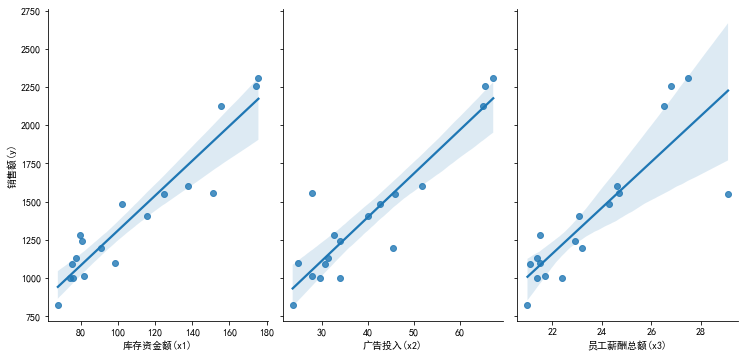

In [5]:
plt.rcParams['axes.unicode_minus']=False 
sns.pairplot(data1, x_vars=data1.columns[:-1], y_vars=data1.columns[-1],kind="reg", size=5, aspect=0.7)
plt.show()

In [6]:
# xl = []
# for i in list(data1.columns[:-1]):
#     xl.append(data1[i].values)
# y = data1[data1.columns[-1]].values
x = data1.iloc[:,0:-1]
y = data1.iloc[:,-1]

模型截距:
196.65388019672423
参数权重:
[ 7.13731954 13.5900369  -4.64679916]
RMSE:
83.5301076806782


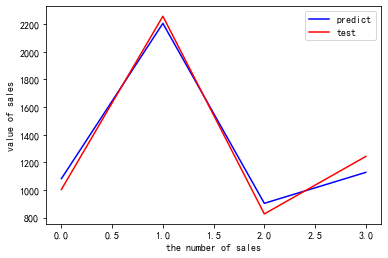

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=532)
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

# 训练后模型截距
print('模型截距:')
print(linreg.intercept_)

# 训练后模型权重（特征个数无变化）
print('参数权重:')
print(linreg.coef_)

y_pred = linreg.predict(X_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) ** 2
sum_erro = np.sqrt(sum_mean /len(y_pred))  # 级数

# calculate RMSE
print (f"RMSE:\n{sum_erro}")

# 学习曲线
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="predict")
plt.plot(range(len(y_pred)), y_test, 'r', label="test")
plt.legend(loc="upper right")  # 显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()


In [8]:
x_model = sm.add_constant(x)
model = sm.OLS(y,x_model)
results = model.fit()
results.summary()

D:\Anaconda\envs\python32\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 销售额(y)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           7.79e-10
Time:                        18:26:34   Log-Likelihood:                -106.25
No. Observations:                  18   AIC:                             220.5
Df Residuals:                      14   BIC:                             224.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.4436    346.263      0.469      0.646    -580.216     905.103
库存资金额(x1)      7.2733      1.353      5.377      0.000       4.372      10.175
广告投入(x2)      13.9588      3.168      4.406      0.001       7.164      20.754
员工薪酬总额(x3)    -4.4139     19.766     -0.223      0.827     -46.807      37.980
==============================================================================
Omnibus:                        0.162   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.052
Skew:                          -0.076   Prob(JB):                        0.974
Kurtosis:                       2.784   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# 回归系数 y = a + bx1 + cx2 +dx3
results.params

const         162.443629
库存资金额(x1)       7.273320
广告投入(x2)       13.958820
员工薪酬总额(x3)     -4.413896
dtype: float64

In [10]:
# 95%回归系数置信区间
results.conf_int(0.05)

,0,1
const,-580.215863,905.103121
库存资金额(x1),4.371920,10.174721
广告投入(x2),7.164057,20.753583
员工薪酬总额(x3),-46.807449,37.979658


In [11]:
# 拟合优度
results.rsquared_adj

0.948330440354034

In [12]:
# f显著性检验
results.fvalue

105.00461184807268

In [13]:
results.f_pvalue

7.78708925358444e-10

In [14]:
# 预测
x1,x2,x3 = 150,45,27
y = results.params[0]+results.params[1]*x1+results.params[2]*x2+results.params[3]*x3

In [15]:
y

1762.4134277432324